检测出的细胞总数

In [1]:
import numpy as np
from cellpose import plot, utils, io
from matplotlib import pyplot as plt

npy_file_path = r"C:\somefiles\cellimage\train\2_seg.npy"
img_file_path = r"C:\somefiles\cellimage\train\2.jpg"

# dat是一个字典
dat = np.load(npy_file_path, allow_pickle=True).item()
# 返回[h,w,3], RGB
img = io.imread(img_file_path)

print(f"共检测出细胞{len(dat['colors'])}")



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.6 
platform:       	win32 
python version: 	3.10.18 
torch version:  	2.7.1+cpu! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


共检测出细胞84


Mask的总面积

In [6]:
# 用来探索dat的结构
print(dat.keys())
print(dat['colors'].shape)
print(dat['masks'].shape)
print(len(dat['flows']))
print(np.unique(dat['masks']))

dict_keys(['outlines', 'colors', 'masks', 'filename', 'flows', 'ismanual', 'manual_changes', 'model_path', 'flow_threshold', 'cellprob_threshold', 'normalize_params', 'restore', 'ratio', 'diameter'])
(84, 3)
(2048, 3072)
4
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84]


In [39]:
# dat['masks'], masks (int, 2D array): Masks where 0=NO masks; 1,2,...=mask labels.
masks = dat['masks']
heigth, weight = masks.shape

print(f"图片尺寸为:{heigth} * {weight}")
print(f"该图片的总像素数为:{heigth * weight}")
print(f"mask占像素:{np.sum(masks > 0)}")
print(f"mask占总图像面积的:{np.sum(masks > 0) / (heigth * weight)*100}%")


图片尺寸为:2048 * 3072
该图片的总像素数为:6291456
mask占像素:369652
mask占总图像面积的:5.875460306803385%


mask对应像素的G-R总值和G-R均值

In [40]:
bool_mask = masks
bool_mask[bool_mask > 1] = 1
print(img.shape)

# 扩展 bool_mask 的维度以匹配 img 的形状
bool_mask_3d = np.expand_dims(bool_mask, axis=-1)  # 形状变为 (2048, 3072, 1)
bool_mask_3d = np.repeat(bool_mask_3d, 3, axis=-1)  # 形状变为 (2048, 3072, 3)

math_img = img * bool_mask_3d # RGB

G = math_img[1]
R = math_img[0]

sub = G - R

print(f"Mask对应像素的G-R总和:{sub.sum()}")
print(f"Mask对应像素的G-R平均值:{sub.mean()}")

(2048, 3072, 3)
Mask对应像素的G-R总和:11207210
Mask对应像素的G-R平均值:1216.0601128472222


画蒙版图

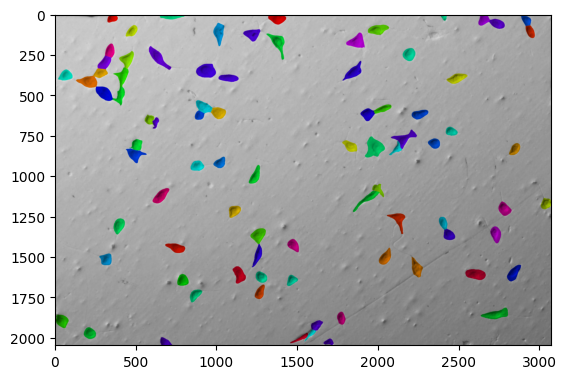

In [44]:
# plot image with masks overlaid
mask_RGB = plot.mask_overlay(img, dat['masks'],
                        colors=np.array(dat['colors']))
plt.imshow(mask_RGB)
plt.show()
# 保存图片
# plt.savefig('mask.png')

描边线图

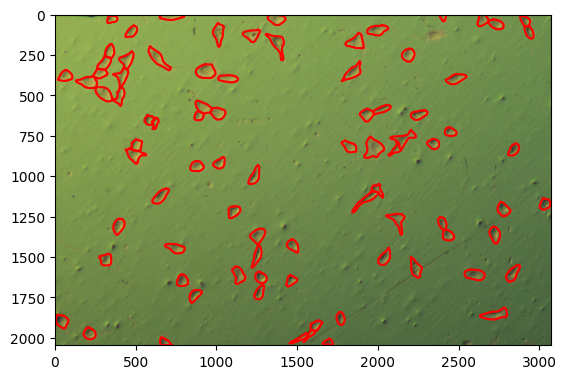

In [45]:
outlines = utils.outlines_list(dat['masks'])
plt.imshow(img)
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

plt.show()
# 保存图片
# plt.savefig('line.png')